We will use a dataset of handwritten digits digitalized in matrices of 8×8 pixels, so each instance will consist initially of 64 attributes. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target
print (digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


We will use the data matrix that has the instances of 64 attributes each and the target vector that has the corresponding digit number.

Let us print the digits to take a look at how the instances will appear



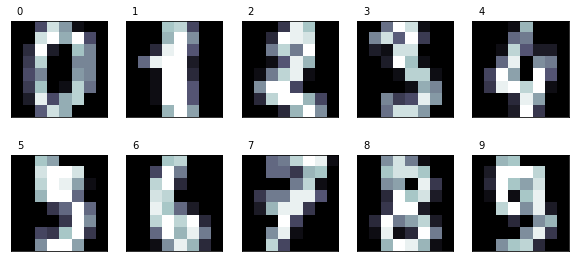

In [ ]:
n_row, n_col = 2, 5

def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # label the image with the target value
        p.text(0, -1, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)

Function that will plot a scatter with the two-dimensional points that will be obtained by a PCA transformation. Our data points will also be colored according to their classes.

In [ ]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')

In scikit-learn, PCA is implemented as a transformer object that learns n number of components through the fit method, and can be used on new data to project it onto these components. In scikit-learn, we have various classes that implement different kinds of PCA decompositions, such as PCA, ProbabilisticPCA, RandomizedPCA, and KernelPCA.

In our case, we will work with the PCA class from the sklearn.decomposition module. The most important parameter we can change is n_components, which allows us to specify the number of features that the obtained instances will have. In our case, we want to transform instances of 64 features to instances of just two features, so we will set n_components to 2.

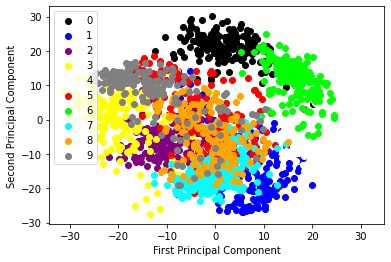

In [ ]:
from sklearn.decomposition import PCA

n_components = 2
estimator = PCA(n_components=n_components)
X_pca = estimator.fit_transform(X_digits)
plot_pca_scatter()

TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


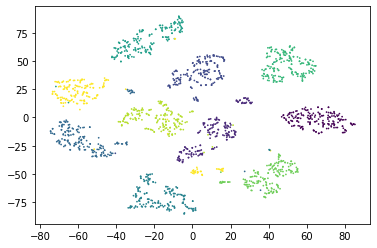

In [ ]:

from sklearn.datasets import load_digits
X, y = load_digits().data, load_digits().target
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity=10)
X_hat = tsne.fit_transform(X)

# To plot the embedding
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_hat[:,0], X_hat[:,1], c = y, s = 0.5)